In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.load('../data storage/prm_data_L16_FCNN_Nh80.pth')
model

OrderedDict([('fc1.weight',
              tensor([[-0.0319, -0.0890,  0.3157,  ..., -0.1775, -0.0652, -0.0493],
                      [-0.1562,  0.2040, -0.0676,  ..., -0.2733,  0.3254,  0.0294],
                      [-0.0718,  0.0176,  0.0270,  ...,  0.0794, -0.0266,  0.1095],
                      ...,
                      [-0.3619,  0.0743,  0.1322,  ...,  0.1522, -0.2483,  0.0513],
                      [ 0.2657,  0.2398,  0.1121,  ...,  0.0084,  0.1787,  0.1093],
                      [-0.1477, -0.2291,  0.3455,  ...,  0.4963, -0.1114,  0.0560]])),
             ('fc2.weight',
              tensor([[-0.4013,  0.8969,  0.7911,  ...,  0.8203,  0.8050,  0.7861],
                      [-0.4142,  0.6939,  0.6039,  ...,  0.3948,  0.9234,  0.6579],
                      [-0.3437,  0.4893,  0.4087,  ...,  0.6646,  0.3632,  0.7416],
                      ...,
                      [-3.7872, -2.7405, -3.4093,  ..., -2.8489, -2.5907, -3.5407],
                      [-3.6908, -2.9454, -3.622

In [3]:
fc_weight = model['fc2.weight']
fc_weight

tensor([[-0.4013,  0.8969,  0.7911,  ...,  0.8203,  0.8050,  0.7861],
        [-0.4142,  0.6939,  0.6039,  ...,  0.3948,  0.9234,  0.6579],
        [-0.3437,  0.4893,  0.4087,  ...,  0.6646,  0.3632,  0.7416],
        ...,
        [-3.7872, -2.7405, -3.4093,  ..., -2.8489, -2.5907, -3.5407],
        [-3.6908, -2.9454, -3.6222,  ..., -3.1017, -2.7063, -3.5674],
        [-3.7620, -3.5077, -3.5105,  ..., -3.4786, -3.1952, -4.0524]])

In [4]:
fc_weight.size()

torch.Size([20, 80])

In [5]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [6]:
fc_weight_np_square

array([[-0.4012559 , -0.41415125, -0.34370413, ..., -3.7871914 ,
        -3.6908188 , -3.7619689 ],
       [ 0.89686024,  0.69390714,  0.4893202 , ..., -2.7404606 ,
        -2.945402  , -3.5077178 ],
       [ 0.7910809 ,  0.603899  ,  0.4087166 , ..., -3.409262  ,
        -3.622239  , -3.5104709 ],
       ...,
       [ 0.8202572 ,  0.39483485,  0.66459864, ..., -2.8489425 ,
        -3.101667  , -3.4786432 ],
       [ 0.80499893,  0.9233995 ,  0.36322764, ..., -2.5906863 ,
        -2.7063358 , -3.195209  ],
       [ 0.78605103,  0.6578514 ,  0.74157345, ..., -3.5407486 ,
        -3.5674284 , -4.0524025 ]], dtype=float32)

In [7]:
fc_weight_np_square.shape

(80, 20)

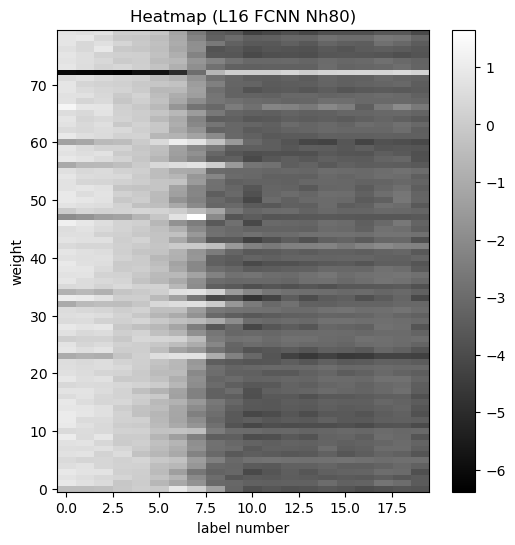

In [8]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN Nh80)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image storage/L16_FCNN_Nh80_wight.png')
plt.show()

In [9]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([  39.502224,   30.4937  ,   24.918362,    2.610948,   -4.022107,
        -30.583546,  -63.408722, -126.53569 , -211.96631 , -244.86844 ,
       -271.69473 , -267.54688 , -262.58307 , -268.04532 , -253.41666 ,
       -259.37222 , -262.43597 , -247.8551  , -246.63226 , -269.43918 ],
      dtype=float32)

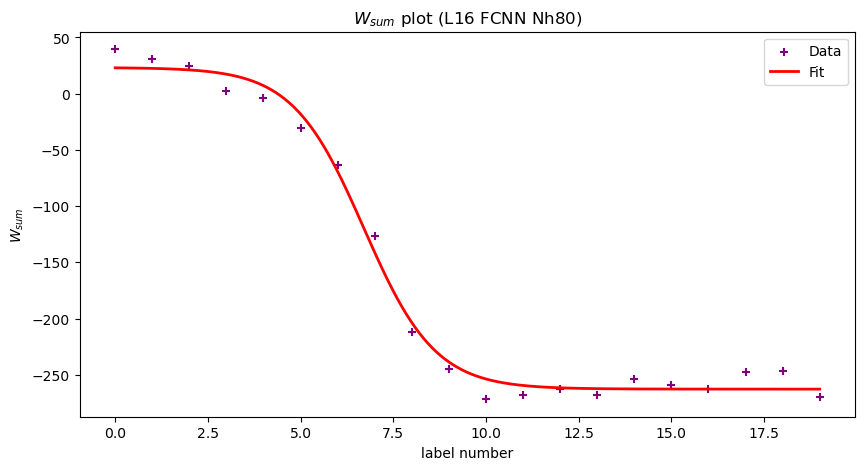

Fitted Parameters:
a: 142.96976629785914
b: -0.520288135850472
c: 3.490476864402678
d: -119.74467636909694


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.title('$W_{sum}$ plot (L16 FCNN Nh80)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
# 図をファイルとして保存
plt.savefig('../image storage/L16_FCNN_Nh80_weight_sum.png')
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [11]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.05 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 6.708738146982891
beta: 0.5354369073491445
